# Perceptron implementation

This code demonstrates basic implementation of a perceptron using NumPy and Pandas packages.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import *

#print(help(generate_data))
#print(help(get_weighted_sum))
#print(help(sigmoid))

In [108]:
n_features = 3
m_examples = 15
data = generate_data(m_examples, n_features, seed=29)
print('Features and labels matrix:\n---------------------------\n')
print(data, '\n\n---------------------------')
X = data.drop(columns=['targets']).values
Y = data['targets'].values
print(f'Number of features: {X.shape[1]}')
print(f'Number of training examples: {X.shape[0]}')

Features and labels matrix:
---------------------------

          x0        x1        x2  targets
0   0.050047  0.506322  0.519234        1
1   0.265203  0.129222  0.020731        1
2   0.393828  0.380229  0.023452        1
3   0.238212  0.788106  0.617595        1
4   0.982793  0.861112  0.631429        1
5   0.186492  0.841894  0.421253        1
6   0.028407  0.952240  0.943834        0
7   0.321769  0.493433  0.272774        0
8   0.760770  0.971630  0.608703        1
9   0.613694  0.231440  0.268094        0
10  0.381394  0.568859  0.732517        1
11  0.047114  0.561463  0.966119        0
12  0.218823  0.417570  0.043238        1
13  0.792898  0.160876  0.658430        1
14  0.236390  0.945161  0.873438        0 

---------------------------
Number of features: 3
Number of training examples: 15


In [109]:
weights, bias = network_init(n_features, seed=15)
print('Initial network parameters:')
for i in range(len(weights)):
    print(f'w{i} = {weights[i]}')
print(f'b = {bias}')

Initial network parameters:
w0 = 0.6927433679651523
w1 = 0.8158171113360575
w2 = 0.3444067577928567
b = 0


# Forward propagation

In this section, forward propagation through the perceptron is performed 

In [110]:
def forward_prop(X, weights, bias):
    weighted_sums = []
    Y_hat = []
    for i in range(m_examples):
        example = X[i,:]
        weighted_sum = get_weighted_sum(example, weights, bias)
        weighted_sums.append(weighted_sum)
        y_hat = sigmoid(weighted_sum)
        Y_hat.append(y_hat)
    return Y_hat, weighted_sums

Y_hat, weighted_sums = forward_prop(X, weights, bias)
initial_pass = pd.DataFrame({'weighted_sum':weighted_sums, 'Y':Y, 'Y_hat':Y_hat})
print('Initial forward propagation results:\n---------------------------\n')
print(initial_pass)

Initial forward propagation results:
---------------------------

    weighted_sum  Y     Y_hat
0       0.626564  1  0.651710
1       0.296279  1  0.573533
2       0.591096  1  0.643617
3       1.020674  1  0.735104
4       1.600802  1  0.832130
5       0.961105  1  0.723343
6       1.121595  0  0.754284
7       0.719400  0  0.672475
8       1.529332  1  0.821909
9       0.706279  0  0.669578
10      0.980577  1  0.727223
11      0.823427  0  0.694963
12      0.507140  1  0.624136
13      0.907288  1  0.712445
14      1.235654  0  0.774807


## Cross-entropy loss

In [111]:
def cross_entropy(Y, Y_hat):
    cost = []
    for i in range(len(Y)):
        y = Y[i]
        y_hat = Y_hat[i]
        cross_entropy_loss = -(y*np.log10(y_hat) + (1-y)*np.log10(1-y_hat))
        cost.append(cross_entropy_loss)
    return cost
cross_entropy_cost = cross_entropy(Y, Y_hat)

initial_pass_with_cost = initial_pass.copy()
initial_pass_with_cost.drop(columns=['weighted_sum'], inplace=True)
initial_pass_with_cost['c-e loss'] = cross_entropy_cost
print(initial_pass_with_cost)

    Y     Y_hat  c-e loss
0   1  0.651710  0.185946
1   1  0.573533  0.241442
2   1  0.643617  0.191373
3   1  0.735104  0.133651
4   1  0.832130  0.079809
5   1  0.723343  0.140656
6   0  0.754284  0.609567
7   0  0.672475  0.484755
8   1  0.821909  0.085176
9   0  0.669578  0.480931
10  1  0.727223  0.138333
11  0  0.694963  0.515648
12  1  0.624136  0.204721
13  1  0.712445  0.147249
14  0  0.774807  0.647444


## Network training

This training algorithm updates weights and bias after each pass through the training data. It means, that after each training example, weights and bias are updated.

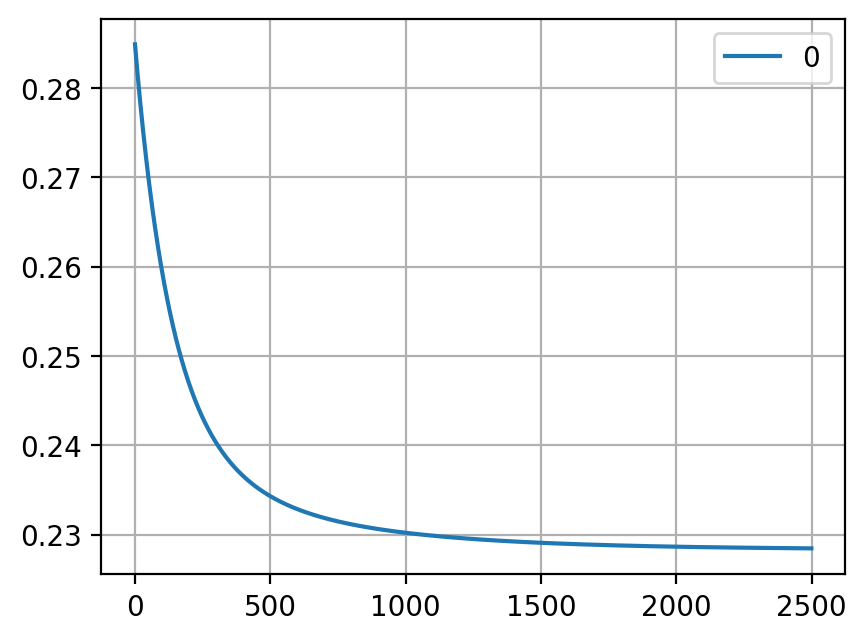

In [112]:
learning_rate = 0.1
epochs = 2500

def cross_entropy_loss(y, y_hat):
    return -(y*np.log10(y_hat) + (1-y)*np.log10(1-y_hat))

def update_weights(weights, alpha, target, prediction, feature):
    return [w + alpha*(target-prediction)*x for x, w in zip(feature, weights)]

def update_bias(bias, alpha, y, y_hat):
    return bias + alpha*(y-y_hat)
        
def train_model(X, Y, alpha=0.01, n_epoch=100):
    W, b = network_init(n_features)
    epoch_cost = []
    for e in range(n_epoch):
        m = X.shape[0]
        individual_loss = []
        for i in range(m):
            x = X[i]
            y = Y[i]
            w_sum = get_weighted_sum(x, W, b)
            y_hat = sigmoid(w_sum)
            loss = cross_entropy_loss(y, y_hat)
            individual_loss.append(loss)
            # gradient descent
            W = update_weights(W, alpha, y, y_hat, x)
            b = update_bias(b, alpha, Y[i], y_hat)
        average_cost = sum(individual_loss)/len(individual_loss)
        epoch_cost.append(average_cost)
    return W, b, epoch_cost
        
final_weights, final_bias, epoch_cost = train_model(X, Y, n_epoch=epochs)

training_data = pd.DataFrame(epoch_cost)
training_data_plot = training_data.plot(kind="line", grid=True)
training_data_plot;

In [113]:
Y_hat_final, weighted_sums_final = forward_prop(X, final_weights, final_bias)
final_pass = pd.DataFrame({'weighted_sum':weighted_sums_final, 'Y':Y, 'Y_hat_final':Y_hat_final})
print('Final forward propagation results:\n---------------------------\n')
print(final_pass)

Final forward propagation results:
---------------------------

    weighted_sum  Y  Y_hat_final
0      -0.037301  1     0.490676
1       1.535673  1     0.822835
2       2.119364  1     0.892771
3       0.426954  1     0.605146
4       2.180515  1     0.898486
5       0.972303  1     0.725578
6      -0.858577  0     0.297637
7       1.325159  0     0.790039
8       1.870882  1     0.866560
9       1.700067  0     0.845543
10      0.145064  1     0.536202
11     -1.345679  0     0.206578
12      1.701169  1     0.845687
13      0.834255  1     0.697254
14     -0.174101  0     0.456584
